In [43]:
import matplotlib.pyplot as plt 
import pandas as pd
import pylab as pl 
import numpy as np 
%matplotlib inline


In [44]:
df = pd.read_csv(r'T:\My Drive\000 ihsan\02 Courses\003GIT\MYProject\my ml project\FuelConsumptionCo2.csv')
df.head(5)

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [45]:
df.describe()

,MODELYEAR,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
count,1067.0,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000,1067.000000
mean,2014.0,3.346298,5.794752,13.296532,9.474602,11.580881,26.441425,256.228679
std,0.0,1.415895,1.797447,4.101253,2.794510,3.485595,7.468702,63.372304
min,2014.0,1.000000,3.000000,4.600000,4.900000,4.700000,11.000000,108.000000
25%,2014.0,2.000000,4.000000,10.250000,7.500000,9.000000,21.000000,207.000000
50%,2014.0,3.400000,6.000000,12.600000,8.800000,10.900000,26.000000,251.000000
75%,2014.0,4.300000,8.000000,15.550000,10.850000,13.350000,31.000000,294.000000
max,2014.0,8.400000,12.000000,30.200000,20.500000,25.800000,60.000000,488.000000


In [46]:
cdf = df[['ENGINESIZE','CYLINDERS','FUELCONSUMPTION_COMB','CO2EMISSIONS']]
cdf.head(5)

,ENGINESIZE,CYLINDERS,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,4,8.5,196
1,2.4,4,9.6,221
2,1.5,4,5.9,136
3,3.5,6,11.1,255
4,3.5,6,10.6,244


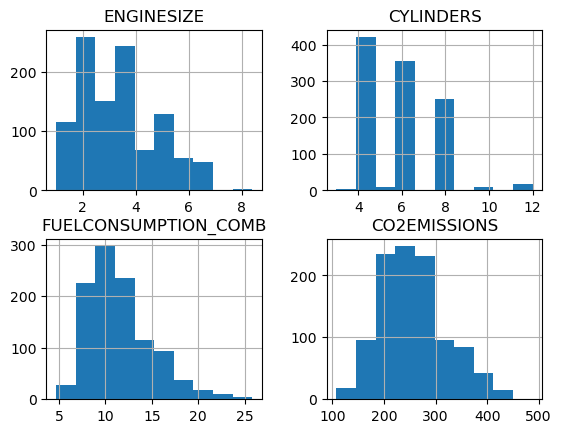

In [47]:
#We can plot each of these features:
viz = cdf
viz.hist()
plt.show()

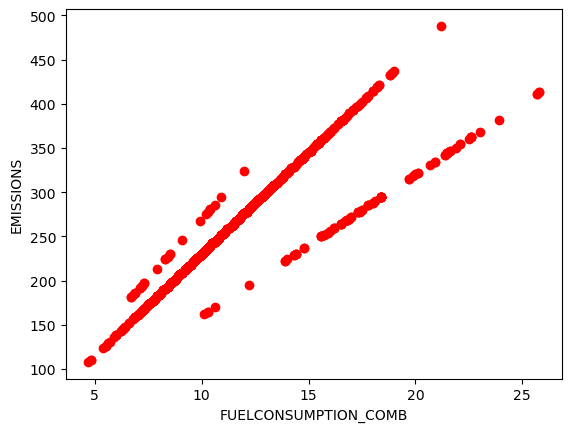

In [48]:
#plot each of these features against the Emission, to see how linear their relationship is:
plt.scatter(cdf.FUELCONSUMPTION_COMB,cdf.CO2EMISSIONS,color = 'red')
plt.xlabel("FUELCONSUMPTION_COMB")
plt.ylabel("EMISSIONS")
plt.show()


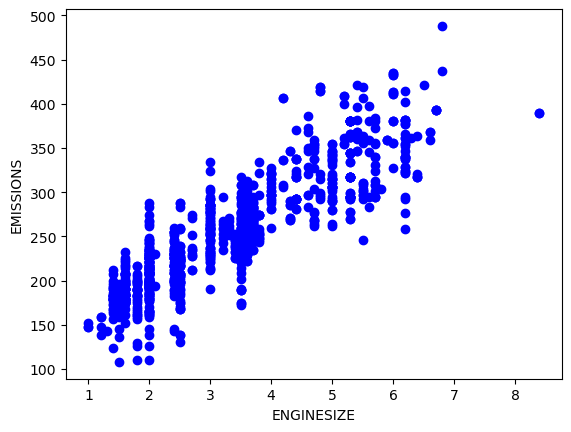

In [49]:
plt.scatter(cdf.ENGINESIZE,cdf.CO2EMISSIONS,color = 'blue')
plt.xlabel("ENGINESIZE")
plt.ylabel("EMISSIONS")
plt.show()




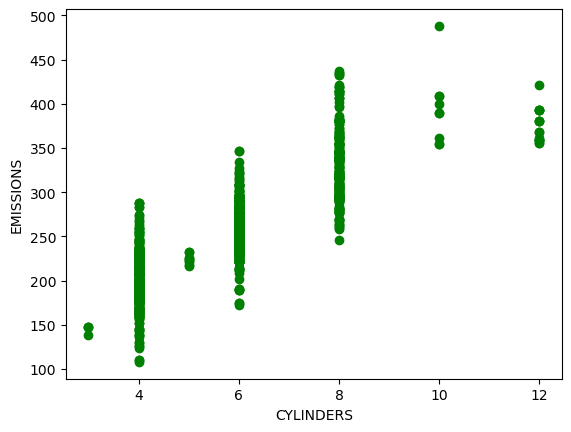

In [50]:
#__CYLINDER__ vs the Emission, to see how linear is their relationship is
plt.scatter(cdf.CYLINDERS,cdf.CO2EMISSIONS,color = 'green')
plt.xlabel("CYLINDERS")
plt.ylabel("EMISSIONS")
plt.show()

# Creating train and test dataset
Let's split our dataset into train and test sets. 80% of the entire dataset will be used for training and 20% for testing. We create a mask to select random rows using np.random.rand() function:

In [51]:
msk = np.random.rand(len(cdf)) < 0.8
train = cdf[msk]
test = cdf[~msk]


# Simple Regression Model
Linear Regression fits a linear model with coefficients B = (B1, ..., Bn) to minimize the 'residual sum of squares' between the actual value y in the dataset, and the predicted value yhat using linear approximation.


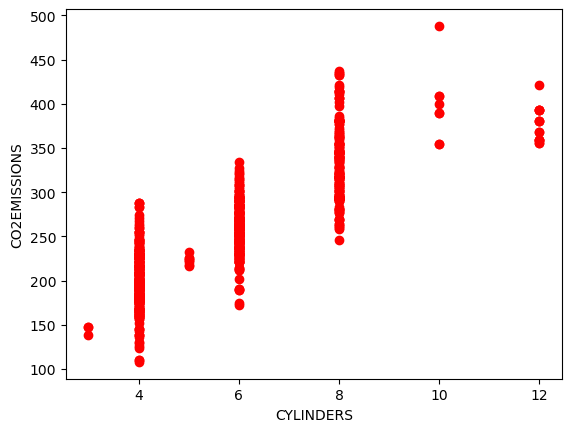

In [52]:
# Train data distribution
plt.scatter(train.CYLINDERS,train.CO2EMISSIONS,color = 'red')
plt.xlabel("CYLINDERS")
plt.ylabel("CO2EMISSIONS")
plt.show()

# Modeling
Using sklearn package to model data.

In [53]:
from sklearn import linear_model
rgr = linear_model.LinearRegression()
train_x = np.asanyarray(train[["CYLINDERS"]])
train_y = np.asanyarray(train[["CO2EMISSIONS"]])
rgr.fit(train_x,train_y)


LinearRegression()

In [54]:
print ("Coefficients: ",rgr.coef_)
print("Intercept: ",rgr.intercept_)

Coefficients:  [[29.83194189]]
Intercept:  [82.5200405]


linear equation is:

y = 10x + 20

Here's what this means:

Coefficient (10): This coefficient indicates that for every 1 unit increase in engine size, fuel consumption increases by 10 units. In other words, a larger engine consumes more fuel.
Intercept (20): The intercept is the fuel consumption when the engine size is 0. 

# Plot outputs

Text(0, 0.5, 'EMISSIONS')

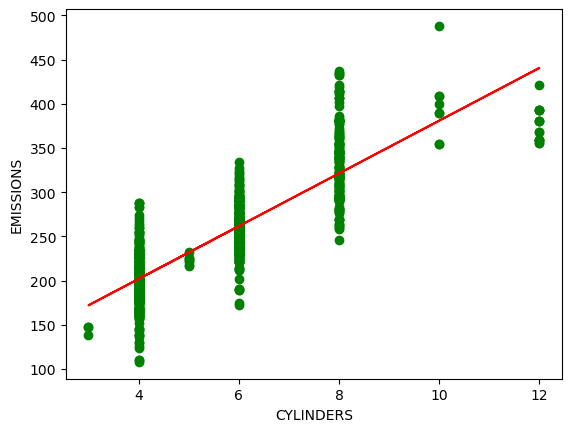

In [55]:
plt.scatter(train.CYLINDERS,train.CO2EMISSIONS,color = 'green')
plt.plot(train_x,rgr.coef_[0][0]*train_x + rgr.intercept_[0],'-r')
plt.xlabel("CYLINDERS")
plt.ylabel("EMISSIONS")

## Evaluation

In [56]:
from sklearn.metrics import r2_score
test_x = np.asanyarray(test[["CYLINDERS"]])
test_y = np.asanyarray(test[["CO2EMISSIONS"]])
test_y_ = rgr.predict(test_x)

In [ ]:
test_x

In [ ]:
test_y_

In [59]:
print ("Mean absolute error : % .2f" % np.mean(np.absolute(test_y_ - test_y)))
print ("Residual sum of squares (MSE): %.2f" % np.mean((test_y_ - test_y) ** 2))
print ("R2-score: %.2f0" % r2_score(test_y , test_y_))

Mean absolute error :  25.34
Residual sum of squares (MSE): 1094.62
R2-score: 0.700


## Evaluate Good or Bad - Mean absolute error
Suppose you are predicting CO2EMISSIONS for vehicles with the following data:

•	Actual CO2 emissions range: [136,255
•	Mean CO2 emissions: Mean=210.4

Relative Error:

Relative MAE=(MAE/Mean CO2EMISSIONS)×100 = (22.84 / 210.4×100) ≈ 10.85 % 

•	A 10.85% error relative to the mean might be acceptable for many regression problems, especially in noisy datasets like emissions data.

•	If this is for regulatory reporting or high-precision predictions, a 10% error might be too high.


## Baseline Calculation - Residual sum of squares (MSE)
The baseline model predicts the mean of the target (CO2EMISSIONS) for all samples.
1. Compute the Mean of CO2EMISSIONS:
Mean CO2EMISSIONS=196+221+136+255+2445=10525=210.4
2. Compute the Baseline Residuals:
Residuals = CO2EMISSIONS−Mean CO2EMISSIONS
[196−210.4,221−210.4,136−210.4,255−210.4,244−210.4]=[−14.4,10.6,−74.4,44.6,33.6]
3. Square the Residuals:
[-14.4^2, 10.6^2, -74.4^2, 44.6^2, 33.6^2] = [207.36, 112.36, 5533.36, 1989.16, 1128.96]
4. Compute the Baseline MSE:
Sum of squared residuals = 207.36+112.36+5533.36+1989.16+1128.96=8880.
Baseline MSE=8880.25
 {8880.2}/{5} = 1776.04Baseline 
Model’s MSE (902.57) is significantly lower than the Baseline MSE (1776.04).


## R2-Score Calculation

Let’s explain the formula and how the R^2  score is calculated:

1.	Residual Sum of Squares (RSS):

o	This represents the sum of the squared differences between the actual and predicted values. It tells us how much error is there in the predictions.

2.	Total Sum of Squares (TSS):

o	This is the total variance in the actual values. It is calculated by summing the squared differences between the actual values and the mean of the actual values.

                            TSS = ∑(y actual−mean of actual) ^2

3.	R^2 Formula: 

       R2=1−(RSS/TSS )


1. Compute TSS (Total Sum of Squares):

First, calculate the mean of the actual CO2EMISSIONS values:

Mean CO2EMISSIONS= 210.4 

Now, compute the sum of squared differences from the mean:

TSS=(196−210.4) ^2+(221−210.4) ^2+(136−210.4) ^2+(255−210.4) ^2+(244−210.4) ^2

TSS=(−14.4) ^2+(10.6) ^2+(−74.4) ^2+(44.6) ^2+(33.6) ^2 TSS=207.36+112.36+5533.36+1989.16+1128.96=8880


2. Compute RSS (Residual Sum of Squares):

Now, calculate the residuals (actual - predicted):

Residuals=[196−190,221−215,136−145,255−250,244−235]

 =[6,6,−9,5,9]

Now, compute the sum of squared residuals:

RSS=(6) ^2+(6) ^2+(−9) ^2+(5) ^2+(9) ^2

RSS=36+36+81+25+81=259

3. Compute R^2-Score:

Finally, we can compute the R^2-score:

R2=1−(RSS / TSS) = 1−(259 / 8880.2) 

= 1−0.0291 = 0.9709

Step 3: Interpretation of the R^2-Score

•	R^2 = 0.9709 means that 97.09% of the variance in the actual CO2EMISSIONS values is explained by the model.

•	The remaining 2.91% of the variance is not explained by the model, which could be due to factors that your model doesn't account for (e.g., vehicle type, driving conditions, etc.).

